In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
sns.set_color_codes(palette='deep')

In [2]:
df = pd.read_csv('/content/matches.csv')
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.shape

(756, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df.isna().sum()

,0
id,0
Season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [6]:
df = df.drop(["umpire3","id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"],axis=1)
df

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0
...,...,...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6


In [7]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [8]:
df['team1'] = df['team1'].str.replace('Delhi Daredevils','DC')
df['team2'] = df['team2'].str.replace('Delhi Daredevils','DC')
df['winner'] = df['winner'].str.replace('Delhi Daredevils','DC')
df['team1'] = df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2'] = df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['winner'] = df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
4,Royal Challengers Bangalore,DC,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0
...,...,...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6


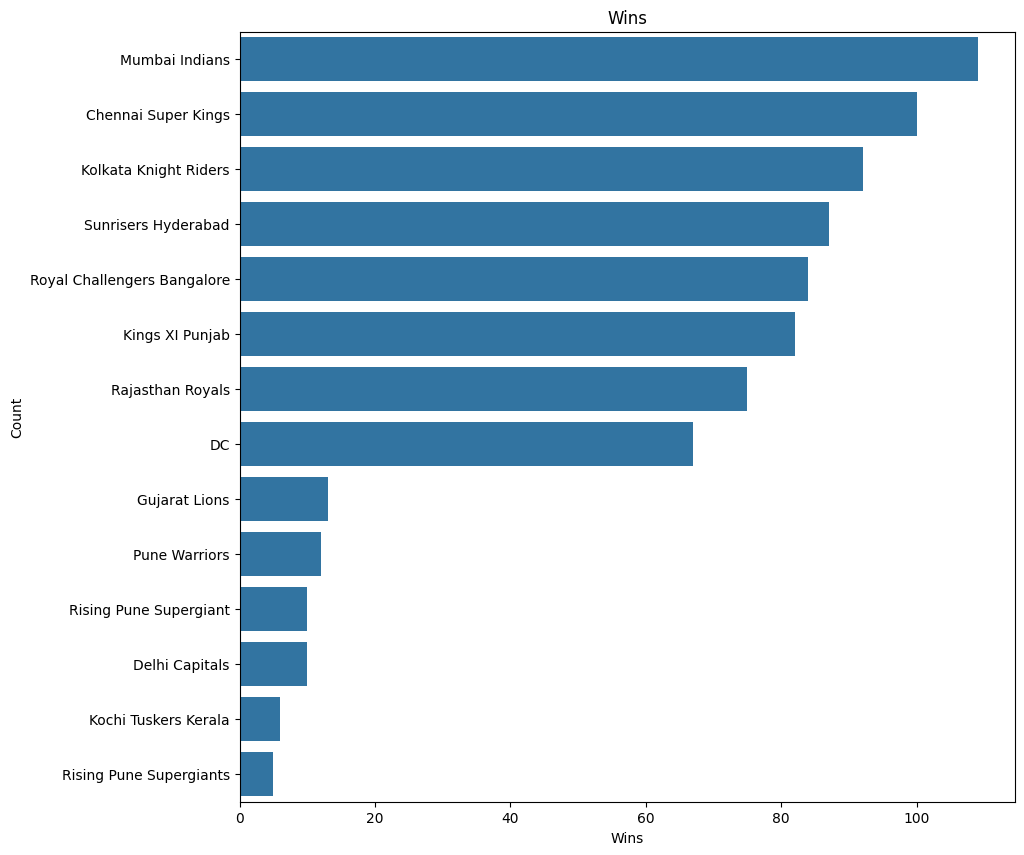

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(y='winner',data=df,order=df['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Count')
plt.title('Wins')
plt.show()

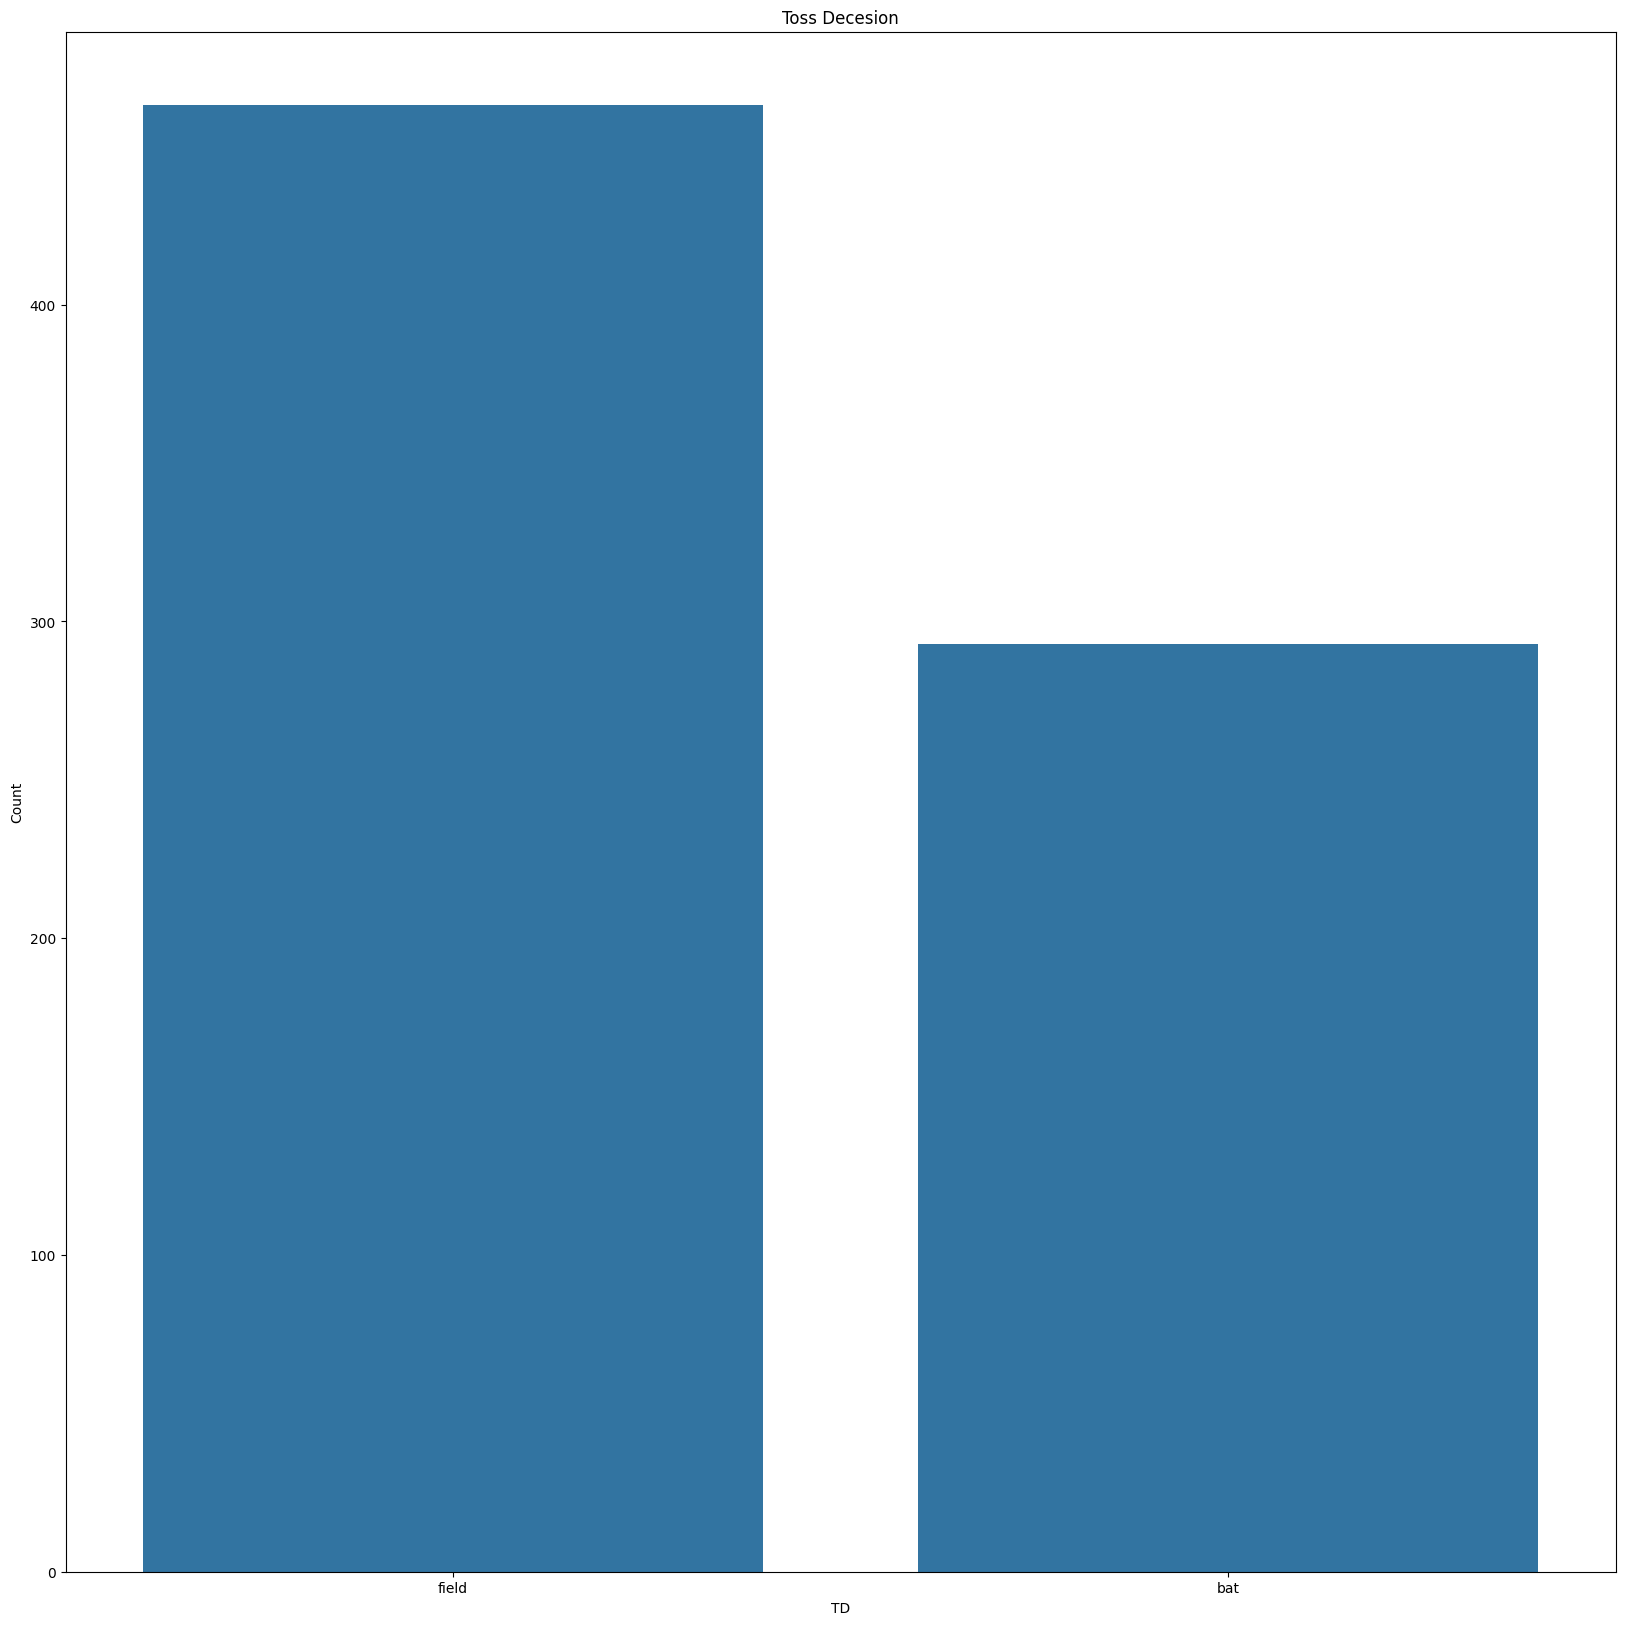

In [10]:
plt.figure(figsize=(20,20))
sns.countplot(x='toss_decision',data=df)
plt.xlabel('TD')
plt.ylabel('Count')
plt.title('Toss Decesion')
plt.show()

In [11]:
x = df.drop(['winner'],axis=1)
y = df['winner']

In [12]:
x = pd.get_dummies(x,drop_first=True)

In [13]:
x.head()

,dl_applied,win_by_runs,win_by_wickets,team1_DC,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,...,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_normal,result_tie
0,0,35,0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1,0,0,7,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,True,False
2,0,0,10,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
3,0,0,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
4,0,15,0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [14]:
x = x.astype(int)
x.head()

,dl_applied,win_by_runs,win_by_wickets,team1_DC,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,...,toss_winner_Mumbai Indians,toss_winner_Pune Warriors,toss_winner_Rajasthan Royals,toss_winner_Rising Pune Supergiant,toss_winner_Rising Pune Supergiants,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_field,result_normal,result_tie
0,0,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,7,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
2,0,0,10,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [15]:
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=50,min_samples_split=5,max_features="sqrt")
model.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=50)

In [18]:
y_pred = model.predict(x_test)

Acurracy Score: 0.9013157894736842


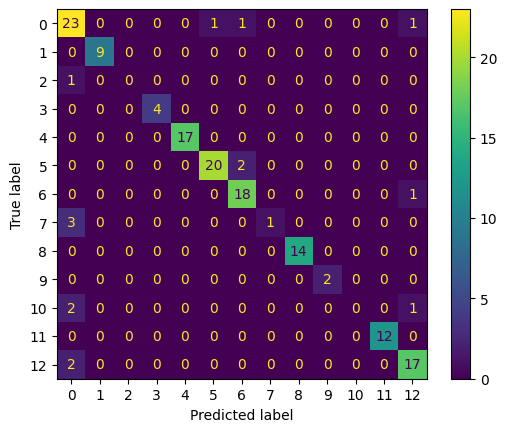

In [20]:
accuracy = accuracy_score(y_test,y_pred)
print("Acurracy Score:",accuracy)
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
cm.plot()
plt.show()